# 1. Reading

Pandas sử dụng <i>read_csv</i> để đọc các file csv. <br/>
Bên cạnh tên của tập tin, chung ta thêm argument <i>na_values</i> để thay các ký tự đại diện cho "non available data" (không có) ở trong file.<br/>
Thông thường các file CSV có header với tên của các cột. Trong file mẫu dưới đây, chúng ta sử dụng tham só <i>usecols</i> để chọn các cột trong file sẽ sử dụng.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
edu = pd.read_csv('./files/ch02/educ_figdp_1_Data.csv', na_values=':', usecols = ["TIME","GEO","Value"])
edu

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


Ở trong trường hợp này, DataFrame trả về từ đọc file được lưu trữ ở <i>edu</i>. Output của <i>edu</i> kích cỡ 384x3.<br/>
Khi mà file quá lớn để hiển thị thì 3 dấu chấm hiện ở giữa các hàng.<br/>
Bên cạnh đó, pandas cung cấp các hàm đọc file như là Excel, HDF5, file bảng, hoặc thậm chí là clipboard (<i> read_excel(), read_hdf(), read_table(), read_clipborad() </i>). Kết quả trả về lưu trữ dạng DataFrame.

Chúng ta có thể sử dụng phương thức <i>head<i> để hiển thị 5 hàng đầu tiên. Nếu chúng ta sử dụng 1 số như argument cho phương thức, điều này sẽ hiển thị số hàng mà ta yêu cầu:

In [2]:
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Tương tự vậy, phương thức <i> tail() </i> trả về 5 hàng cuối cùng

In [3]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


<i>describe()</i>: Thống kê nhanh các thông tin trên tất cả các cột trong DataFrame

In [4]:
edu.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


# 2. Selecting Data

Nếu chúng ta muốn chọn các tập con của data ở trong DataFrame, sử dụng cặp dấu ngoặc vuông ([ ]) sau DataFrame. Tập con có thể có 1 số cách chọn. Nếu chúng ta muốn chỉ chọn 1 cột trong DataFrame, chúng ta chỉ cần put tên của nó giữa cặp ngoặc vuông. Kết quả trả về sẽ là 1 <i>Series</i>, không phải DataFrame, bởi vì chỉ có 1 cột được lấy ra.

In [5]:
edu['Value']

0       NaN
1       NaN
2      5.00
3      5.03
4      4.95
       ... 
379    5.90
380    6.10
381    6.81
382    6.85
383    6.76
Name: Value, Length: 384, dtype: float64

Nếu chúng ta muốn chọn tập con của các hàng trong DataFrame (giả sử là từ hàng 10 đến 13), chúng ta có thể làm như sau (thường được gọi là <i>slice</i> hàng)

In [6]:
edu[10:14]

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91
13,2001,European Union (27 countries),4.99


Chọn tập con các cột và hàng, có thể sử dụng indexing <i>loc</i>

In [7]:
edu.loc[90:94,['TIME','GEO']]

,TIME,GEO
90,2006,Belgium
91,2007,Belgium
92,2008,Belgium
93,2009,Belgium
94,2010,Belgium


# 3. Filtering Data

Một cách khác để chọn các tập con (subset) của data là dùng indexing Boolean. Thường được gọi là <i>fillter</i>. Ví dụ, chúng ta muốn lọc những giá trị lớn hơn hoặc bằng 6.5, có thể làm như sau:

In [8]:
edu[edu['Value']>6.5].tail()

,TIME,GEO,Value
286,2010,Malta,6.74
287,2011,Malta,7.96
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


# 4. Filtering Mising values

Pandas sử dụng giá trị đặc biệt là <b>NaN</b> đại diện cho missing values.<br/>
Trong Python, NaN là 1 con trỏ float trả về một toán tử nhất định khi một trong những kết quả trả về giá trị không xác định. 2 <i>NaN</i> <b>không bao giờ</b> bằng nhau. Vì thế, cách để xác định giá trị <i>NaN</i> trong DataFrame là sử dụng hàm <i> isnull()</i>. Hàm này có thể sử dụng để lọc ra các hàng có giá trị không xác định.

In [9]:
edu[edu["Value"].isnull()].head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


# 5. Manipulating Data

Khi đã chọn được dữ liệu mong muốn,tiếp theo chúng ta cần biết làm thế nào để thao tác dữ liệu (manipulating data). Có 1 số toán tử có thể sử dụng:
- <i>count()</i>: Số quan sát không null
- <i>sum()</i>: Tổng các giá trị
- <i>mean()</i>: Kỳ vọng các giá trị
- <i>median()</i>: median các giá trị (giá trị giữa trong tập hợp)
- <i>min() /max()</i>: min/max
- <i>prod()</i>: product các giá trị
- <i>std()</i>: Độ lệch chuẩn
- <i>var()</i>: variance

<b> axis=0</b>: Áp dụng trên các cột của mỗi hàng<br/>
<b> axis=1</b>: Ngược lại

In [10]:
edu.max(axis=0)

TIME      2011
GEO      Spain
Value     8.81
dtype: object

Có thể sử dụng +, -, *, / cho từng entire hàng.<br/>
Tuy nhiên chúng ta có thể áp dụng hàm bất kỳ cho DataFrame hoặc Series chỉ bằng cách setting tên như là tham số của phương thức <i>apply</i>.

In [11]:
edu["Value"].apply(np.sqrt).head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64

Nếu chúng ta cần thiết kế 1 hàm cụ thể, có thể sử dụng hàm in-line, thông thường là hàm nặc danh (lambda function). Một lambda-function là một hàm mà không tên. Nó chỉ cần xác định tham số nó nhận, giữa keyword <i>lamda</i> và ký tự (:).

In [12]:
edu["Value"].apply(lambda d: d**2).head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

Để tạo cột mới trong DataFrame, chúng ta có thể gán trực tiếp (=). Chú ý nếu cột ta gán đã tồn tại, giá trị sẽ được ghi đè.

In [13]:
edu['ValueNorm']=edu["Value"]/edu["Value"].max()
edu.head()

,TIME,GEO,Value,ValueNorm
0,2000,European Union (28 countries),NaN,NaN
1,2001,European Union (28 countries),NaN,NaN
2,2002,European Union (28 countries),5.00,0.567537
3,2003,European Union (28 countries),5.03,0.570942
4,2004,European Union (28 countries),4.95,0.561862


Nếu muốn xóa các cột của DataFrame, có thể sử dụng hàm <i>drop()</i>.<br/>
Xóa hàng nếu <i>axis=0</i>, xóa cột nếu <i>axis=1</i><br/>
Trong pandas, hàm drop trả về bản sao của DataFrame sửa đổi chứ không ghi đè vào DataFrame đó. Nếu không muốn giữ các giá trị cũ, có thể setting keyword <i>inplace</i> là <i>True</i>. Mặc định thì keyword này là <i>False</i>, nghĩa là 1 bản sao của dữ liệu được trả về.

In [14]:
edu.drop("ValueNorm", axis=1, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [15]:
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Xoá hàng cuối cùng:

In [16]:
edu.drop(max(edu.index), axis=0, inplace=True)
edu.tail()

,TIME,GEO,Value
378,2006,Finland,6.18
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


Sử dụng <i>append</i> để chèn 1 hàng mới vào DataFrame.<br/>
Hàm này nhận các tham số là hàng mới, dạng dictionary với các key là tên cột, giá trị thêm vào tương ứng với value của dictionary.<br/>
Phải cài đặt <i>ignore_index = True</i> thì thêm giá trị mới vào cuối DataFrame, còn không index 0 sẽ là hàng mới, sẽ tạo ra 1 lỗi mới nó đã tồn tại.

In [15]:
edu = edu.append({'TIME':2000, "Value": 5,"GEO":'a'}, ignore_index = True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


Để xóa các giá trị <i>NaN</i>. Có thể sử dụng hàm <i>dropna()</i>

Xem thêm: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [28]:
edu.dropna(subset=["Value"]).head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


Thay vì loại bỏ, chúng ta có thể thay thế các giá trị này, sử dụng hàm <i>fillna()</i>. Nếu chỉ muốn fill NaN vào 1 số cột cụ thể, chúng ta phải thiết lập tham số cho hàm <i>fillna()</i> là 1 dictionary với tên cột là key và value là giá trị để thay thế vào NaN của cột đó.

In [29]:
edu.fillna(value={'Value':0}).head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


# 6. Sorting

Một chức năng quan trọng khác chúng ta sẽ cần khi kiểm tra data của chúng ta đó là sắp xếp các cột. Chúng ta có thể sắp xếp một DataFrame với cột bất kỳ, sử dụng hàm <i>sort</i>.<br/>
Giả sử sắp xếp cột <i>Value</i> từ lớn tới nhỏ.

In [30]:
edu.sort_values(by="Value", ascending = False, inplace = True)
edu.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


Nhớ rằng keyword <i>inplace</i> cho biết rằng DataFrame sẽ được ghi đè và không có DataFrame mới trả về.<br/>
<i>ascending = False</i> là sắp xếp theo thứ tự giảm dần.<br/>
Nếu chúng ta muốn trả về thứ tự ban đầu, chúng ta có thể sắp xếp theo chỉ số sử dụng <i>sort_index</i> và quy định <i>axis=0</i>:

In [31]:
edu.sort_index(axis=0, ascending=True, inplace=True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


# 7. Grouping Data

Một cách rất hữu ích để inspect (kiểm tra) data là nhóm nó theo 1 số tiêu chí. <br/>
Pandas có hàm <i>groupby</i> cho phép thực hiện điều này.<br/>
Ví dụ muốn tính mean của cột Value cho mỗi country theo tất cả các vùng miền qua các năm.

In [33]:
edu[["GEO","Value"]].groupby("GEO").mean()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333
Denmark,8.331667
Estonia,5.270833
Euro area (13 countries),5.019091
Euro area (15 countries),5.025455


# 8. Rearranging Data

Sử dụng hàm <i>pivot_table</i><br/>
Ví dụ chúng ta muốn chuyển đổi DataFrame thành 1 bảng tính với tên country như là index, trong khi cột là các năm bắt đầu từ 2006 và các giá trị sẽ là cột Value. Để làm điều này chúng ta cần fillter data và rồi pivot nó như sau:

In [34]:
filltered_data = edu[edu["TIME"]>2005]
pivedu = pd.pivot_table(filltered_data, values = "Value", index= ["GEO"], columns=["TIME"])
pivedu

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51
Denmark,7.97,7.81,7.68,8.74,8.81,8.75
Estonia,4.70,4.72,5.61,6.03,5.66,5.16
Euro area (13 countries),4.87,4.80,4.94,5.32,5.28,5.15
Euro area (15 countries),4.87,4.81,4.95,5.32,5.29,5.16


Bây giờ, chúng ta có thể sử dụng index mới để chọn hàng theo labels, sử dụng toàn tử <i>loc</i>

In [22]:
pivedu.loc[["Spain","Portugal"],[2006,2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
Portugal,5.07,5.27


# 9. Ranking Data

In [23]:
pivedu = pivedu.drop([
'Euro area (13 countries)',
'Euro area (15 countries)',
'Euro area (17 countries)',
'Euro area (18 countries)',
'European Union (25 countries)',
'European Union (27 countries)',
'European Union (28 countries)'
] ,
axis = 0)
pivedu = pivedu.rename(index = {'Germany (until 1990 former territory of the FRG)': 'Germany'})
pivedu = pivedu.dropna()
pivedu.rank( ascending = False , method = 'first')


TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,10.0,7.0,11.0,7.0,8.0,8.0
Belgium,5.0,4.0,3.0,4.0,5.0,5.0
Bulgaria,21.0,21.0,20.0,20.0,22.0,22.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,19.0,20.0,21.0,21.0,20.0,19.0
Denmark,1.0,1.0,1.0,1.0,1.0,1.0
Estonia,16.0,15.0,9.0,6.0,11.0,13.0
Finland,4.0,5.0,4.0,3.0,3.0,4.0
France,7.0,6.0,8.0,9.0,9.0,9.0


# 10. Plotting

Pandas DataFrame và Series có thể vẽ đồ thị sử dụng hàm <i>plot</i><br/>
Hàm này sử dụng thư viện graphics Matplotlib.<br/>
Ví dụ nếu chúng ta muốn vẽ biểu đồ giá trị tích lũy cho mỗi country trong 6 năm qua, chúng ta có thể lấy Series thu được trong ví dụ trước và vẽ nó trực tiếp bằng cách gọi hàm <i>plot</i>

In [35]:
pivedu.sum(axis=1).sort_values(ascending =False)

GEO
Denmark                                             49.76
Cyprus                                              45.19
Malta                                               38.37
Belgium                                             38.11
Ireland                                             34.31
France                                              34.29
Netherlands                                         34.18
Austria                                             33.89
Slovenia                                            33.12
Estonia                                             31.88
Finland                                             31.84
Portugal                                            31.74
Latvia                                              31.42
European Union (25 countries)                       31.12
European Union (27 countries)                       30.92
European Union (28 countries)                       30.91
Hungary                                             30.56
Lithuania 

<AxesSubplot:title={'center':'Total values for country'}, xlabel='GEO'>

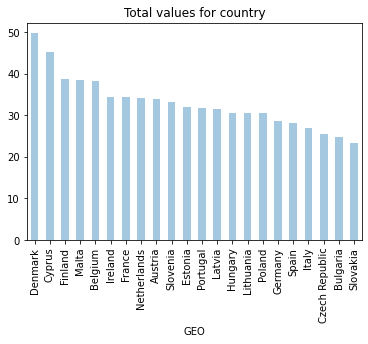

In [24]:
totalSum = pivedu.sum(axis=1).sort_values(ascending =False)
totalSum.plot(kind='bar', style='b', alpha=0.4, title='Total values for country')

- kind: Định nghĩa loại đồ thị sẽ được vẽ
- style: Style của đồ thị, ví dụ trên set màu là b (blue)
- alpha: tỷ lệ % style. Ví dụ trên mức độ đậm màu xanh là 40%
- title: tiêu đề đồ thị

Cũng có thể vẽ một DataFrame trực tiếp. Trong trường hợp này, mỗi cột coi như một Series riêng biệt. Ví dụ, thay vì in giá trị tích lũy qua các năm, chúng ta có thể vẽ giá trị cho mỗi năm.

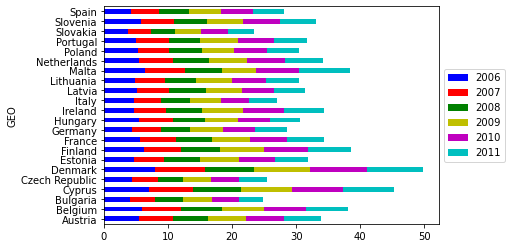

In [25]:
my_colors = ['b', 'r', 'g', 'y', 'm', 'c']
ax = pivedu.plot(kind = 'barh',stacked = True ,color = my_colors)
ax.legend(loc = 'center left', bbox_to_anchor = (1, .5))

Trong trường hợp này chúng ta dùng 1 horizontal bar (kind='barh')<br/>
stacked = True: chồng tất cả các năm của contry lên bar.<br/>
legend: Cài đặt cho bảng chú thích